In [10]:
import pandas as pd
from pathlib import Path

from readii.io.loaders import loadFeatureFilesFromImageTypes
from readii.data.label import setPatientIdAsIndex
from readii.analyze.correlation import getFeatureCorrelations, getSelfAndCrossCorrelations
from readii.analyze.plot_correlation import plotCorrelationHistogram 

In [5]:
features_dir = Path("../../procdata/RADCURE/deep_learning/train_test_split/test_features")

In [11]:
extracted_feature_sets = loadFeatureFilesFromImageTypes(extracted_feature_dir=features_dir,
                                                        image_types=['original', 'shuffled_roi'],
                                                        drop_labels=True,
                                                        labels_to_drop=["survival_time_in_years","survival_event_binary"])

original_features = setPatientIdAsIndex(extracted_feature_sets["original"], patient_id_col="patient_ID")
shuffled_roi_features = setPatientIdAsIndex(extracted_feature_sets["shuffled_roi"], patient_id_col="patient_ID")

In [12]:
correlation_matrix = getFeatureCorrelations(vertical_features = original_features,
                                            horizontal_features = shuffled_roi_features,
                                            method="pearson",
                                            vertical_feature_name="original",
                                            horizontal_feature_name="shuffled_roi")

In [13]:
original_correlations, shuffed_roi_correlations, cross_correlations = getSelfAndCrossCorrelations(correlation_matrix,
                                                                                                  "original",
                                                                                                  "shuffled_roi")

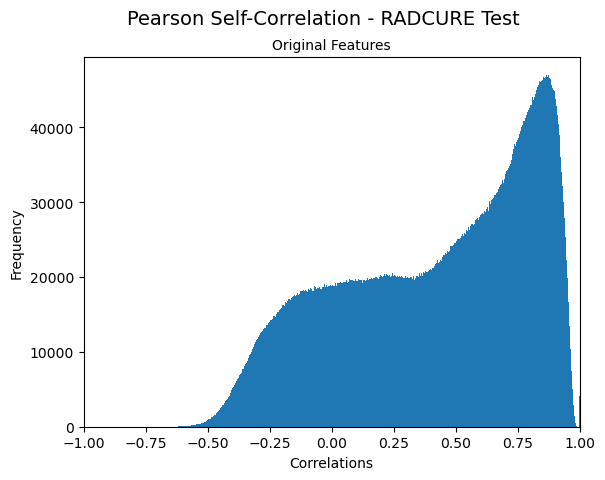

In [ ]:
orig_hist = plotCorrelationHistogram(original_correlations,
                                    num_bins=450,
                                    title = "Pearson Self-Correlation - RADCURE Test",
                                    subtitle = "Original Features")

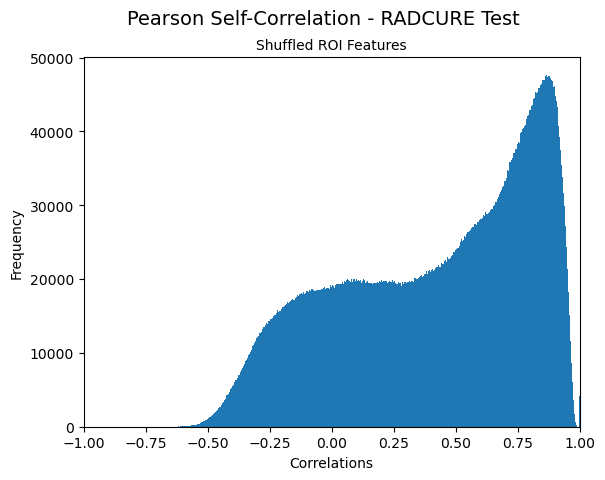

In [17]:
shuffled_roi_hist = plotCorrelationHistogram(shuffed_roi_correlations, 
                                             num_bins=450,
                                             title = "Pearson Self-Correlation - RADCURE Test",
                                             subtitle = "Shuffled ROI Features")

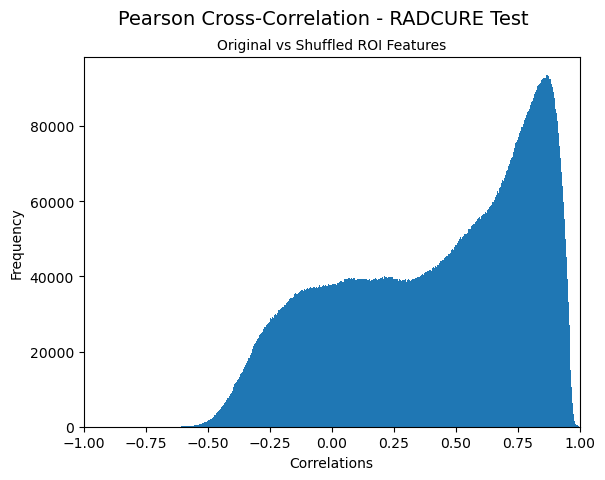

In [18]:
cross_corr_hist = plotCorrelationHistogram(cross_correlations,
                                           num_bins=450,
                                           title = "Pearson Cross-Correlation - RADCURE Test",
                                           subtitle = "Original vs Shuffled ROI Features")